In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('Data4.csv', delimiter=';', index_col=0, encoding='cp1251')
df

,ISO,UA,Cql,Ie,Iec,Is
Albania,ALB,Албанія,"0,97392353","0,605347614","0,538672856","0,510112666"
Algeria,DZA,Алжир,"0,782134498","0,58721932","0,348159396","0,497985576"
Angola,AGO,Ангола,"0,372343539","0,27439361","0,332117384","0,346906645"
Argentina,ARG,Аргентина,"0,883830062","0,699685109","0,28199471","0,518820368"
Armenia,ARM,Вірменія,"1,016498793","0,718326882","0,535647909","0,486498047"
...,...,...,...,...,...,...
Uruguay,URY,Уруґвай,"1,198779297","0,612819394","0,568066795","0,648818585"
"Venezuela, Bolivarian Republic of",VEN,"Венесуела, Боліварська Республіка","0,703459931","0,670452164","0,249923267","0,367243869"
Viet Nam,VNM,В'єтнам,"0,553255653","0,371843431","0,39385414","0,423359346"
Yemen,YEM,Ємен,"0,364579432","0,244049144","0,357659851","0,330743343"


In [3]:
df.Cql = df.Cql.astype(str).str.replace(',', '.').astype(float)
df.Ie = df.Ie.astype(str).str.replace(',', '.').astype(float)
df.Iec = df.Iec.astype(str).str.replace(',', '.').astype(float)
df.Is = df.Is.astype(str).str.replace(',', '.').astype(float)
df

,ISO,UA,Cql,Ie,Iec,Is
Albania,ALB,Албанія,0.973924,0.605348,0.538673,0.510113
Algeria,DZA,Алжир,0.782134,0.587219,0.348159,0.497986
Angola,AGO,Ангола,0.372344,0.274394,0.332117,0.346907
Argentina,ARG,Аргентина,0.883830,0.699685,0.281995,0.518820
Armenia,ARM,Вірменія,1.016499,0.718327,0.535648,0.486498
...,...,...,...,...,...,...
Uruguay,URY,Уруґвай,1.198779,0.612819,0.568067,0.648819
"Venezuela, Bolivarian Republic of",VEN,"Венесуела, Боліварська Республіка",0.703460,0.670452,0.249923,0.367244
Viet Nam,VNM,В'єтнам,0.553256,0.371843,0.393854,0.423359
Yemen,YEM,Ємен,0.364579,0.244049,0.357660,0.330743


In [4]:
df_test = pd.read_csv('Data4t.csv', delimiter=';', index_col=0, encoding='cp1251')
df_test

,ISO,UA,Cql,Ie,Iec,Is
Togo,TGO,Того,"0,45349807","0,216806252","0,368234721","0,433950896"
Tunisia,TUN,Туніс,"0,899461952","0,659123985","0,418255976","0,514745939"
Turkey,TUR,Туреччина,"0,859283802","0,498840185","0,509228185","0,499453094"
Uganda,UGA,Уґанда,"0,571284014","0,362945628","0,448731923","0,375726313"
Ukraine,UKR,Україна,"0,802203636","0,689164485","0,303554874","0,462744168"


In [5]:
df_test.Cql = df_test.Cql.astype(str).str.replace(',', '.').astype(float)
df_test.Ie = df_test.Ie.astype(str).str.replace(',', '.').astype(float)
df_test.Iec = df_test.Iec.astype(str).str.replace(',', '.').astype(float)
df_test.Is = df_test.Is.astype(str).str.replace(',', '.').astype(float)
df_test

,ISO,UA,Cql,Ie,Iec,Is
Togo,TGO,Того,0.453498,0.216806,0.368235,0.433951
Tunisia,TUN,Туніс,0.899462,0.659124,0.418256,0.514746
Turkey,TUR,Туреччина,0.859284,0.498840,0.509228,0.499453
Uganda,UGA,Уґанда,0.571284,0.362946,0.448732,0.375726
Ukraine,UKR,Україна,0.802204,0.689164,0.303555,0.462744


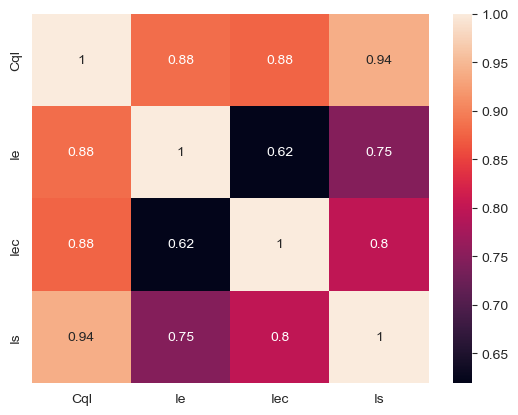

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [7]:
numeric = df.select_dtypes(include=np.number)
numeric

,Cql,Ie,Iec,Is
Albania,0.973924,0.605348,0.538673,0.510113
Algeria,0.782134,0.587219,0.348159,0.497986
Angola,0.372344,0.274394,0.332117,0.346907
Argentina,0.883830,0.699685,0.281995,0.518820
Armenia,1.016499,0.718327,0.535648,0.486498
...,...,...,...,...
Uruguay,1.198779,0.612819,0.568067,0.648819
"Venezuela, Bolivarian Republic of",0.703460,0.670452,0.249923,0.367244
Viet Nam,0.553256,0.371843,0.393854,0.423359
Yemen,0.364579,0.244049,0.357660,0.330743


In [8]:
numeric.merge(numeric)

,Cql,Ie,Iec,Is
0,0.973924,0.605348,0.538673,0.510113
1,0.782134,0.587219,0.348159,0.497986
2,0.372344,0.274394,0.332117,0.346907
3,0.883830,0.699685,0.281995,0.518820
4,1.016499,0.718327,0.535648,0.486498
...,...,...,...,...
127,1.198779,0.612819,0.568067,0.648819
128,0.703460,0.670452,0.249923,0.367244
129,0.553256,0.371843,0.393854,0.423359
130,0.364579,0.244049,0.357660,0.330743


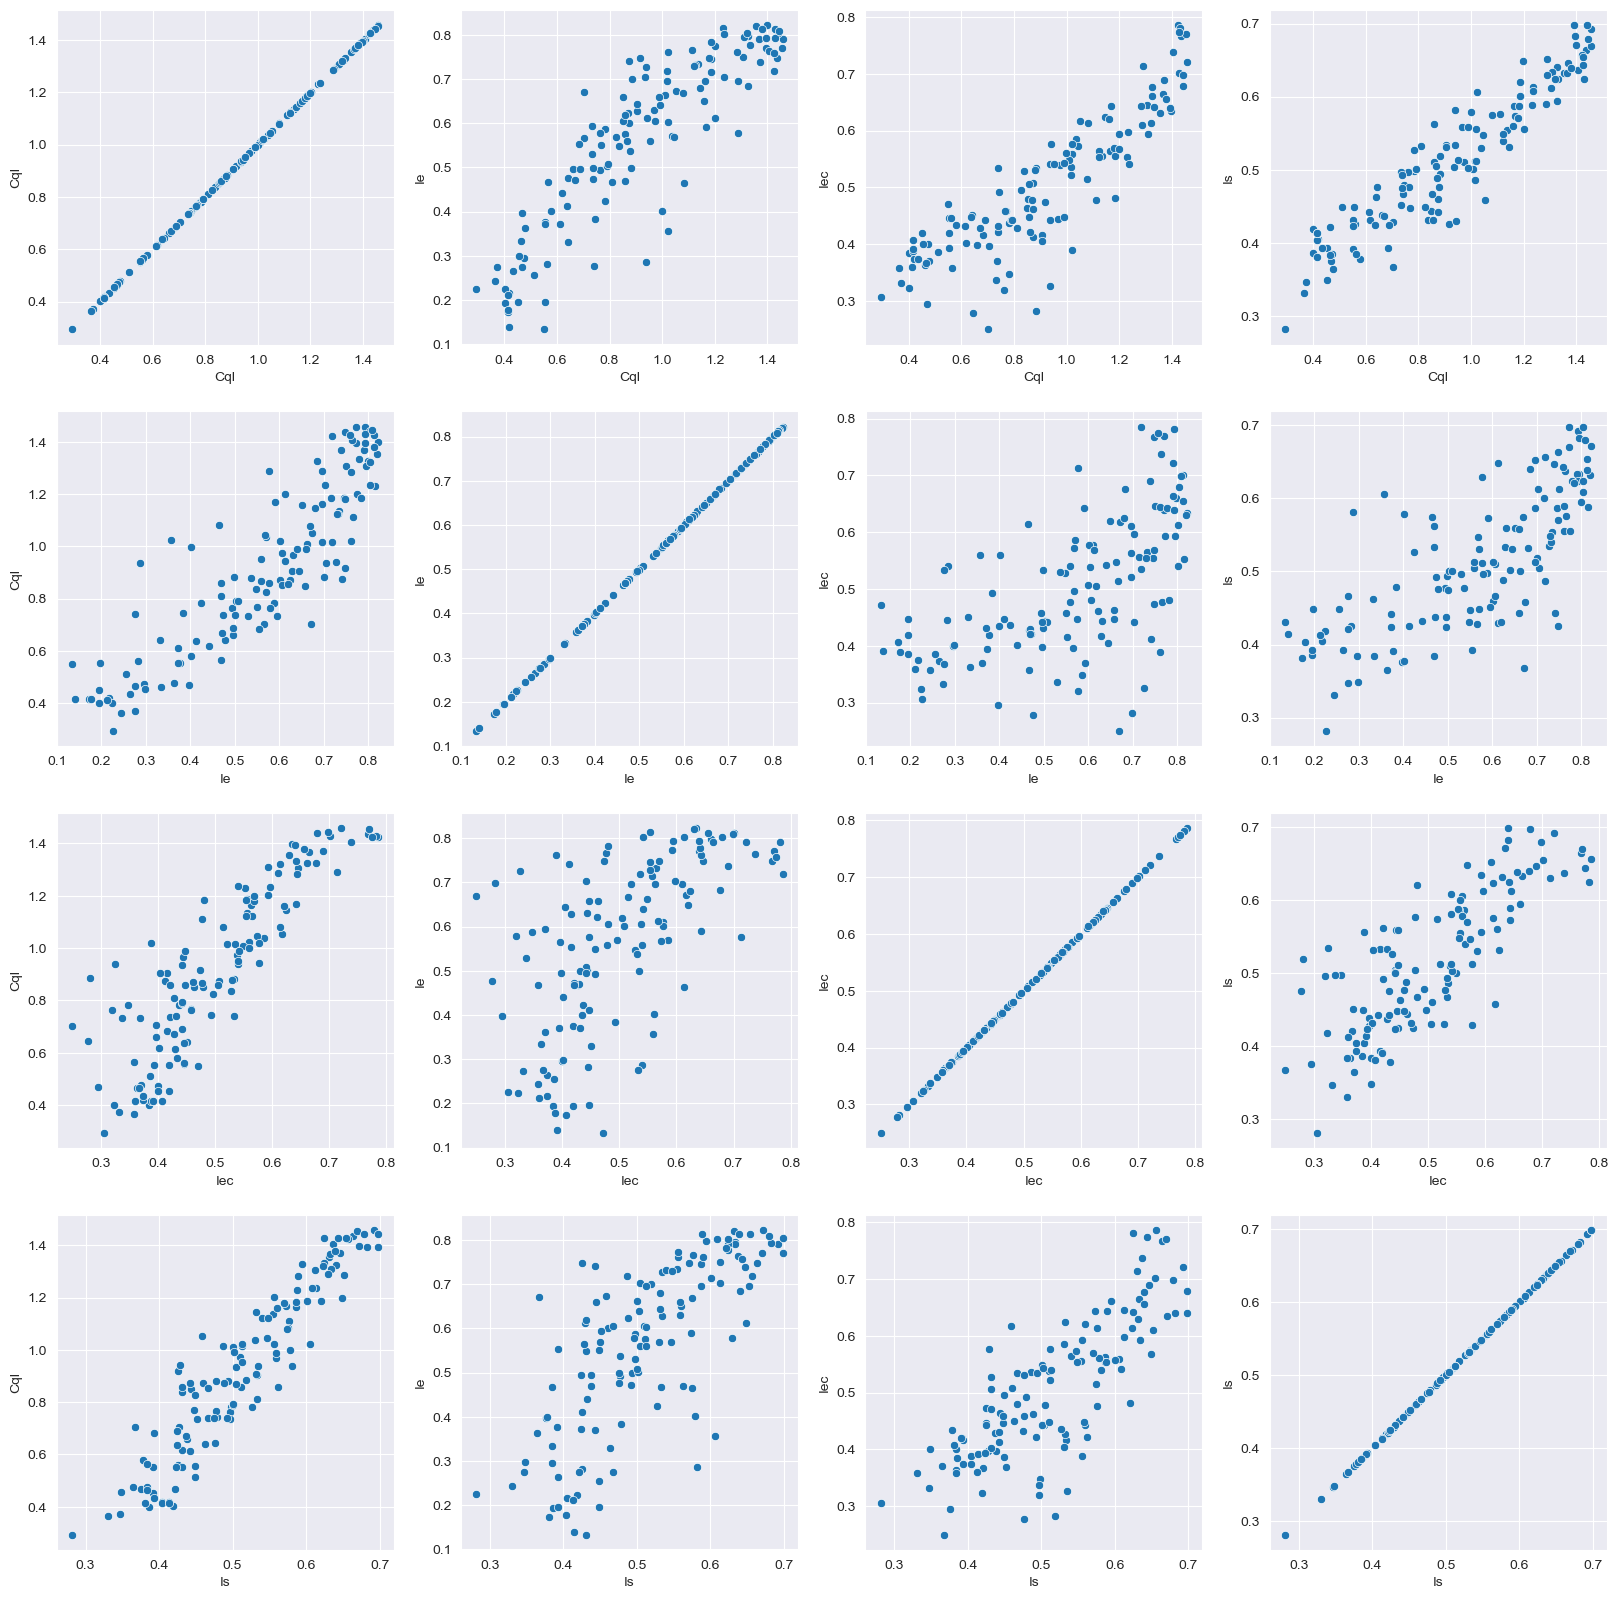

In [9]:
fig, axes = plt.subplots(numeric.shape[1], numeric.shape[1], figsize=(20, 20))

for row, col1 in enumerate(numeric.columns):
    for column, col2 in enumerate(numeric.columns):
        sns.scatterplot(x=numeric[col1], y=numeric[col2], ax=axes[row, column])

In [10]:
X_train = df.drop(['ISO', 'UA', 'Is'], axis=1)
y_train = df.Is
X_test = df_test.drop(['ISO', 'UA', 'Is'], axis=1)
y_test = df_test.Is

In [11]:
degrees = []
accuracies = []
predictions = []

for degree in range(1, 14):
    polynomial_feautures = PolynomialFeatures(degree=degree)

    X_train_polynomial = polynomial_feautures.fit_transform(X_train)
    X_test_polynomial = polynomial_feautures.transform(X_test)

    polynomial_model = LinearRegression()
    polynomial_model.fit(X_train_polynomial, y_train)

    y_pred = polynomial_model.predict(X_test_polynomial)

    degrees.append(degree)
    accuracies.append(polynomial_model.score(X_test_polynomial, y_test))
    predictions.append(y_pred)

poly_df = pd.DataFrame.from_dict({
    'degree': degrees,
    'accuracy': accuracies,
    'predictions': predictions
})

poly_df.set_index('degree', inplace=True)
poly_df

,accuracy,predictions
degree,,
1,0.899632,"[0.4126135233717582, 0.5020957600309623, 0.495..."
2,0.977882,"[0.42550556733598544, 0.5018778754329953, 0.50..."
3,0.985692,"[0.43448862372313724, 0.5144497675528928, 0.50..."
4,0.989287,"[0.43231201171875, 0.51611328125, 0.5000915527..."
5,0.990365,"[0.43537425994873047, 0.5150671005249023, 0.49..."
6,0.997347,"[0.4335060119628906, 0.5144805908203125, 0.499..."
7,0.982694,"[0.44332313537597656, 0.5128030776977539, 0.49..."
8,0.986385,"[0.431468560435988, 0.5137725385376513, 0.4992..."
9,0.950782,"[0.43638026765439974, 0.5143344215031362, 0.49..."


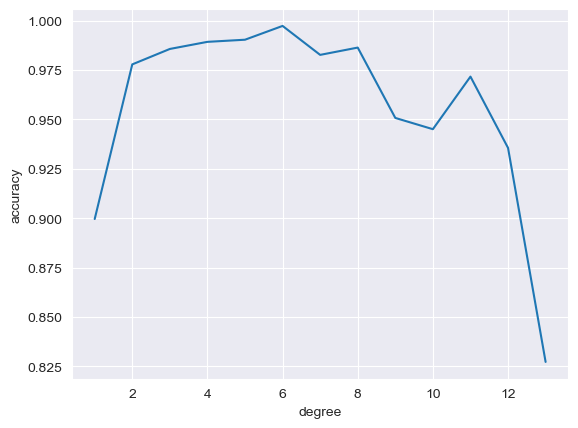

In [12]:
sns.lineplot(x=poly_df.index, y=poly_df.accuracy);

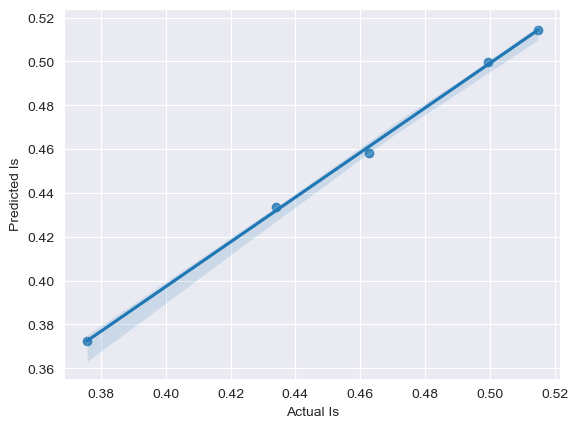

In [13]:
sns.regplot(x=y_test, y=poly_df.loc[poly_df.accuracy.idxmax()].predictions).set(xlabel='Actual Is', ylabel='Predicted Is');